## Task 1

### Basic manipulation with initial data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('breast-cancer-data.csv')

#take a look at the data and then check for NaN values
data.head(10)
data.isnull().values.any()

#drop the ID column
data = data.drop(['id'], axis=1)

#change Malignant and Benign to binary values, thus 1 - has cancer, 0 - no cancer.
data['diagnosis'] = data.diagnosis.map({"M": 1, "B" : 0})
data.info()

#look at class distribution
data.diagnosis.value_counts()
data.head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,1
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,1
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,1
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,1
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,1


### Start with KNN algorithm

In [2]:
#select features and target
features = ['texture_mean', 'radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
        'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'smoothness_worst']
X = data[features]
y = data['diagnosis']

#scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(str(X[0]))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20)
len(X_train), len(X_test)

clfKnn = KNeighborsClassifier().fit(X_train, y_train)
y_predKnn = clfKnn.predict(X_test)

#distribution of y test(actual malignat and benign cases)
print('y actual : \n' +  str(y_test.value_counts()))
#distribution of y predicted
print('y predicted : \n' + str(pd.Series(y_predKnn).value_counts()))

[-2.07333501  1.09706398  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  1.30768627]
y actual : 
0    86
1    57
Name: diagnosis, dtype: int64
y predicted : 
0    83
1    60
dtype: int64


In [3]:
#Evaluation metrics for the model
print('Accuracy Score : ' + str(accuracy_score(y_test,y_predKnn)))
print('Precision Score : ' + str(precision_score(y_test,y_predKnn)))
print('Recall Score : ' + str(recall_score(y_test,y_predKnn)))
print('F1 Score : ' + str(f1_score(y_test,y_predKnn)))

#Confusion Matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_predKnn)))

Accuracy Score : 0.951048951048951
Precision Score : 0.9166666666666666
Recall Score : 0.9649122807017544
F1 Score : 0.9401709401709402
Confusion Matrix : 
[[81  5]
 [ 2 55]]


The scores are all high, which shows that the model performs well. But if we look at the recall, I see that I still need to reduce the number of false negatives and increase this score. By taking a look at the confusion matrix, I can also see that there are 6 false negatives, and in matters such as serious diseases - this is something that should be avoidable!

##### Grid search for KNN to maximize the recall score

In [4]:
clfKnn = KNeighborsClassifier()

params = { 'n_neighbors': [3,5,7,11,9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
gClf = GridSearchCV(clfKnn, params, cv = 3, scoring = "recall")

#launch grid search
gClf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 11, 9],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [5]:
#analyze the best scores
print(gClf.best_score_, gClf.best_params_)

0.9162922482102267 {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [6]:
#output and analyze all the results
list(zip(gClf.cv_results_["mean_test_score"], gClf.cv_results_["params"]))

[(0.9098023282986,
  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}),
 (0.9098023282986,
  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}),
 (0.9034717353897139,
  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}),
 (0.9034717353897139,
  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}),
 (0.8904467529156841,
  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}),
 (0.8904467529156841,
  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}),
 (0.896902151976717,
  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}),
 (0.896902151976717,
  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}),
 (0.896902151976717,
  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}),
 (0.896902151976717,
  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}),
 (0.9162922482102267,
  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}),
 (0.916292248

In [7]:
y_predKnnG = gClf.predict(X_test)

#Evaluation metrics for the model
print('Best parameters :' + str(gClf.best_estimator_))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_predKnnG)))
print('Precision Score : ' + str(precision_score(y_test,y_predKnnG)))
print('Recall Score : ' + str(recall_score(y_test,y_predKnnG)))
print('F1 Score : ' + str(f1_score(y_test,y_predKnnG)))

#Confusion Matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_predKnnG)))

Best parameters :KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
Accuracy Score : 0.958041958041958
Precision Score : 0.9322033898305084
Recall Score : 0.9649122807017544
F1 Score : 0.9482758620689654
Confusion Matrix : 
[[82  4]
 [ 2 55]]


The metric changed to better, altought not by much. But I can see an increase in the recall value, which is good. And alo in the matrix, there's less false negatives.

### SVM

In [8]:
from sklearn.svm import SVC

def getClassifier(ktype):
    if ktype == "Polynomial":
        return SVC(kernel = 'poly', gamma = "auto")
    elif ktype == "RBF":
        return SVC(kernel = 'rbf', gamma = "auto")
    elif ktype == "Sigmoid":
        return SVC(kernel = 'sigmoid', gamma = "auto")
    elif ktype == "Linear":
        return SVC(kernel = 'linear', gamma = "auto")    

In [9]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']

for i in kernels:
    svcClf = getClassifier(i)
    svcClf.fit(X_train, y_train)
    y_predSvm = svcClf.predict(X_test)
    
    print(str(i))
    print('Accuracy Score : ' + str(accuracy_score(y_test,y_predSvm)))
    print('Precision Score : ' + str(precision_score(y_test,y_predSvm)))
    print('Recall Score : ' + str(recall_score(y_test,y_predSvm)))
    print('F1 Score : ' + str(f1_score(y_test,y_predSvm)))
    
    #Confusion Matrix
    print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_predSvm)))
    

Polynomial
Accuracy Score : 0.916083916083916
Precision Score : 1.0
Recall Score : 0.7894736842105263
F1 Score : 0.8823529411764706
Confusion Matrix : 
[[86  0]
 [12 45]]
RBF
Accuracy Score : 0.958041958041958
Precision Score : 0.9322033898305084
Recall Score : 0.9649122807017544
F1 Score : 0.9482758620689654
Confusion Matrix : 
[[82  4]
 [ 2 55]]
Sigmoid
Accuracy Score : 0.9020979020979021
Precision Score : 0.9056603773584906
Recall Score : 0.8421052631578947
F1 Score : 0.8727272727272727
Confusion Matrix : 
[[81  5]
 [ 9 48]]
Linear
Accuracy Score : 0.972027972027972
Precision Score : 0.9818181818181818
Recall Score : 0.9473684210526315
F1 Score : 0.9642857142857142
Confusion Matrix : 
[[85  1]
 [ 3 54]]


Tried SVM on the dataset, with different kernels. Linear kernel has the best accuracy score, but RBF gives the best recall, which in my opinion in this situation is more important.

##### SVM with Grid Search

In [10]:
# create the parameter grid
params = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
for i in kernels:
    svcClf = getClassifier(i)
    gridClf = GridSearchCV(svcClf, params, cv = 3, scoring = "recall")
    
    gridClf.fit(X_train, y_train)
    y_predSvmG = gridClf.predict(X_test)
    
    print(str(i))
    print('Best parameters :' + str(gridClf.best_estimator_))
    print('Accuracy Score : ' + str(accuracy_score(y_test,y_predSvmG)))
    print('Precision Score : ' + str(precision_score(y_test,y_predSvmG)))
    print('Recall Score : ' + str(recall_score(y_test,y_predSvmG)))
    print('F1 Score : ' + str(f1_score(y_test,y_predSvmG)))
    
    #Confusion Matrix
    print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_predSvmG)))

C:\Users\begav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Polynomial
Best parameters :SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy Score : 0.958041958041958
Precision Score : 0.9322033898305084
Recall Score : 0.9649122807017544
F1 Score : 0.9482758620689654
Confusion Matrix : 
[[82  4]
 [ 2 55]]


C:\Users\begav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RBF
Best parameters :SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy Score : 0.9790209790209791
Precision Score : 0.9655172413793104
Recall Score : 0.9824561403508771
F1 Score : 0.9739130434782608
Confusion Matrix : 
[[84  2]
 [ 1 56]]


C:\Users\begav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Sigmoid
Best parameters :SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy Score : 0.9790209790209791
Precision Score : 0.9821428571428571
Recall Score : 0.9649122807017544
F1 Score : 0.9734513274336283
Confusion Matrix : 
[[85  1]
 [ 2 55]]
Linear
Best parameters :SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy Score : 0.972027972027972
Precision Score : 0.9818181818181818
Recall Score : 0.9473684210526315
F1 Score : 0.9642857142857142
Confusion Matrix : 
[[85  1]
 [ 3 54]]


C:\Users\begav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


As it can be seen from the results, the grid search optimized the parameters and the scores are even better now. A significant change can be seen on the Polynomial kernel, since the f1_score for example increased from 0.88 to 0.94. By using Grid Search, it was easy to discover which SVM kernel and with which parameters would give the best results. In this situation, it is the SVM with the RBF kernel.

### Voting Classifier combining SVM, KNN and decision tree.

In [11]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_predTree = tree.predict(X_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_predTree)))
print('Precision Score : ' + str(precision_score(y_test,y_predTree)))
print('Recall Score : ' + str(recall_score(y_test,y_predTree)))
print('F1 Score : ' + str(f1_score(y_test,y_predTree)))

#Confusion Matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_predTree)))

Accuracy Score : 0.9020979020979021
Precision Score : 0.8524590163934426
Recall Score : 0.9122807017543859
F1 Score : 0.8813559322033898
Confusion Matrix : 
[[77  9]
 [ 5 52]]


In [12]:
from sklearn.ensemble import VotingClassifier

#instantiate the individual algorithms for the ensemble, the tree with default values
#the others two, with the optimized parameters chosen from above
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
svc = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#create the ensemble
vc = VotingClassifier(estimators = [('tree', tree), ('knn', knn), ('svc', svc)], voting = 'hard')

#train the model
vc.fit(X_train, y_train)

y_predVc = vc.predict(X_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_predVc)))
print('Precision Score : ' + str(precision_score(y_test,y_predVc)))
print('Recall Score : ' + str(recall_score(y_test,y_predVc)))
print('F1 Score : ' + str(f1_score(y_test,y_predVc)))
    
#Confusion Matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_predVc)))

Accuracy Score : 0.972027972027972
Precision Score : 0.9649122807017544
Recall Score : 0.9649122807017544
F1 Score : 0.9649122807017544
Confusion Matrix : 
[[84  2]
 [ 2 55]]


The Voting Classifier gives very good results too!

### Random Forest Model

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
    
#Confusion Matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.951048951048951
Precision Score : 0.9166666666666666
Recall Score : 0.9649122807017544
F1 Score : 0.9401709401709402
Confusion Matrix : 
[[81  5]
 [ 2 55]]


C:\Users\begav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


So far, all of the algorithm I used have seen good results. The random forest model is not an exception. I expected I would get the best results with this one, but it still did not beat the SVM with RBF kernel.

## Task 2

### Part a
a)Select a continuous variable in the dataset and cluster its values. Use any two clustering methods (k-
means, agglomerative, DBSCAN etc.). For each method, explain how you chose clustering parameters
(e.g., the number of clusters, linkage type etc. as appropriate for the algorithm).

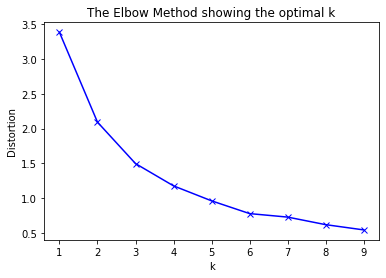

In [14]:
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

#Use the Elbow method to see how many clusters are necessary for K means.
x1 = data.texture_mean
x2 = data.smoothness_mean

# Initialize the plot/data
plt.plot()
Xplot = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Xplot)
    kmeanModel.fit(Xplot)
    distortions.append(sum(np.min(cdist(Xplot, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The elbow method gives you the optimal number of clusters for the K-means model. From the plot above, we can 2 as a good number for n_clusters.

In [15]:
#Fit the model with 2 clusters as suggested by the elbow method
from sklearn.cluster import KMeans
cont = data[['texture_mean']]
km = KMeans(n_clusters = 2, random_state = 22)
km.fit(cont)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)

In [16]:
#A method which we used in clas to plot the results
def KmeansAndPlot(col1, col2, nClusters = 2):
    """
    Performs k-means clustering and plots the resulting clusters
    
    Arguments:
    col1, col2 -- columns to cluster and plot
    nClusters -- number of clusters to look for
    """
    # put the columns together into one dataframe
    X = pd.concat([col1, col2], axis = 1)
    # instantiate k-means
    km = KMeans(n_clusters = nClusters, random_state = 1)
    # run k-means
    km.fit(X)
    # obtain labels for the resulting clusters
    labels = km.labels_
    
    # plot the data, coloring points based on the cluster
    plt.scatter(col1, col2, c = labels, cmap = 'Set1')
    plt.title("K-means, {} clusters".format(nClusters))
    plt.xlabel(col1.name)
    plt.ylabel(col2.name)

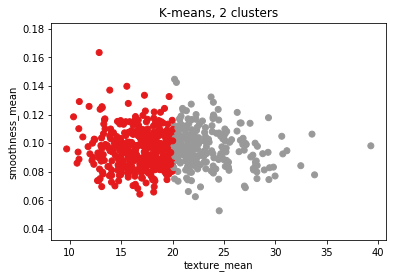

In [17]:
KmeansAndPlot(data.texture_mean, data.smoothness_mean)

DBSCAN

In [18]:
#Helper function that performs DBSCAN and plots the resulting clusters, retrieved this example from one of our classes.

from sklearn.cluster import DBSCAN

def DbscanAndPlot(col1, col2, minSamples = 5, eps = 0.5):
    """
    Performs clustering with DBSCAN and plots the resulting clusters
    
    Arguments:
    dataframe -- dataframe with the data
    col1, col2 -- names of columns to cluster and plot
    minSamples, eps -- DBSCAN parameters
    """
    # Your code here
     # put the columns together into one dataframe
    Xdb = pd.concat([col1, col2], axis = 1)
    # instantiate k-means
    ac = DBSCAN(min_samples = minSamples, eps = eps)
    # run k-means
    ac.fit(Xdb)
    # obtain labels for the resulting clusters
    labels = ac.labels_
    
    # plot the data, coloring points based on the cluster
    plt.scatter(col1, col2, c = labels, cmap = 'Set1')
    #plt.title("K-means, {} clusters".format(nClusters))
    plt.xlabel(col1.name)
    plt.ylabel(col2.name)
    labels = ac.labels_

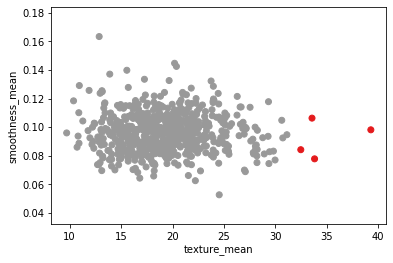

In [19]:
DbscanAndPlot(data.texture_mean, data.smoothness_mean, minSamples = 5, eps = 1)

Clustering performed with some random values for minSamples and the epsilon. From this output, one can see that the parameters did not give us the best output. Next, I would try to find the optimal values.

In [20]:
from sklearn.neighbors import NearestNeighbors

Xdb = pd.concat([data.texture_mean, data.smoothness_mean], axis = 1)
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(Xdb)
distances, indices = nbrs.kneighbors(Xdb)

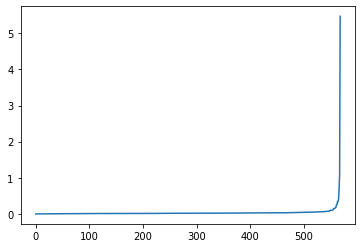

In [21]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

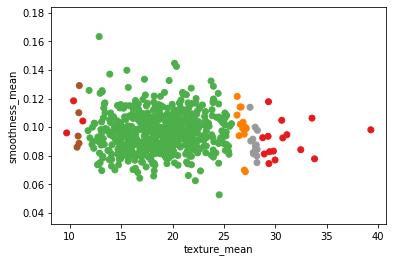

In [22]:
DbscanAndPlot(data.texture_mean, data.smoothness_mean, minSamples = 5, eps = 0.3)

So, a optimal value for epsilon for a DBSCAN model can be found with the help of the K distance plot histogram and its 'knee'. Once you plot the graph, you choose the point where the maximum curvature can be seen.

What about minSamples?
Usually a low number would create a lot of noise or cluster the outliers, thus it is not recommended to choose something below 3. I did not have any specific method for choosing a value for this, but I tried 4 and 5.

## Task 4

### Part a
a)Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier?

In [23]:
from time import process_time

#load the data
dataset = pd.read_csv('mnist_784.csv')

#get a fist look at the data
dataset.head()
dataset.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


In [24]:
#We rename the class feature because we had trouble working with it with its original name
dataset = dataset.rename(columns = {'class':'Class'})
dataset.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'Class'],
      dtype='object', length=785)

In [25]:
x = dataset.drop(['Class'], axis = 1)
y = dataset['Class']

#split the data into the test/training 
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 10000, random_state = 20)

#compute the execution time for the training set
classifier = RandomForestClassifier(random_state = 20)
t1_start = process_time()
classifier.fit(xTrain, yTrain)
t1_stop = process_time()
print("Total time for the training set:",t1_stop-t1_start)

C:\Users\begav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Total time for the training set: 8.140625


In [26]:
#look at the accuracy of the random forest before reducing the dimensionality
yP = classifier.predict(xTest)
accuracy_score(yTest, yP)

0.9492

Above are the results before the PCA is performed. I also added the f1_score, just so I could later compare the performance of the second algorithm with the initial one.

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state = 20)
newXtrain = pca.fit_transform(xTrain)

In [28]:
#compute the execution time for the training set (reduced)
classifier2 = RandomForestClassifier(random_state = 20)
t1_start = process_time()
classifier2.fit(newXtrain, yTrain)
t1_stop = process_time()
print("Total time for the training set:",t1_stop-t1_start)

C:\Users\begav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Total time for the training set: 17.484375


In [29]:
#look at the accuracy of the random forest after reducing the dimensionality
newXtest = pca.transform(xTest)
yP2 = classifier2.predict(newXtest)
accuracy_score(yTest, yP2)

0.8906

Time is actually slower than it was before, even more than twice! Dimensionality reduction does not always decrease time in training, since it really depends on the dataset, the model and the training algorithm. Also, it is a common thing for performance to be reduced in dimensionality reduction, since we might lose some important data. Thus, PCA did not do very well in combination with this specific dataset and the chosen training algorithm.

### Part b
b) Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the images you built and modify some images using techniques such as rotate, flip, darken, and look at their reconstruction error: notice how much larger the reconstruction error is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.

In [30]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

x2 = olivetti.data
y2 = olivetti.target

#split the data into test and train set
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(x2, y2, test_size = 0.2, random_state = 20)
len(xTrain2), len(xTest2)

(320, 80)

In [31]:
print(xTrain2.shape, yTrain2.shape)
print(xTest2.shape, yTest2.shape)

(320, 4096) (320,)
(80, 4096) (80,)


In [32]:
#Plot the faces from the dataset
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

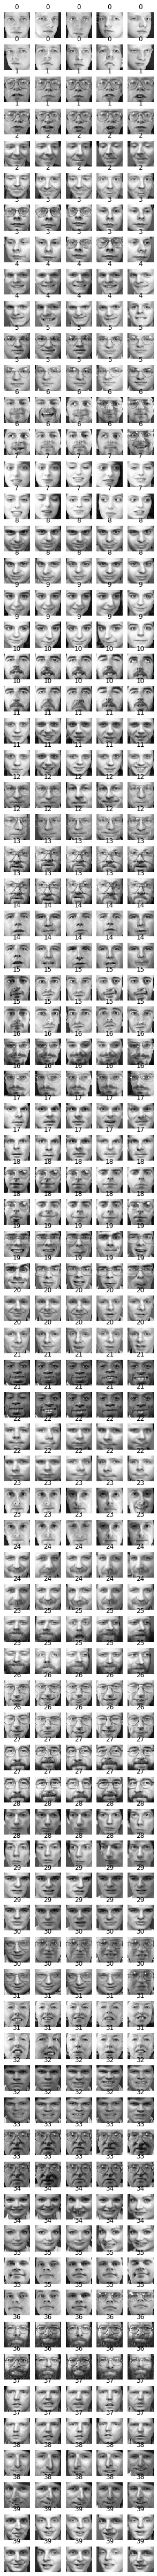

In [33]:
plot_faces(x2, y2, n_cols=5)

In [34]:
#PCA with 99% of the variance explained
pca99 = PCA(0.99)
X_train_pca = pca99.fit_transform(xTrain2)
X_test_pca = pca99.transform(xTest2)

pca.n_components_

154

In [35]:
X_test_pca

array([[ 1.307596  , -1.090133  , -3.5375102 , ...,  0.07044366,
        -0.03724772,  0.11009233],
       [-8.866644  ,  4.499498  , -1.2969657 , ...,  0.05947989,
         0.02334778, -0.08260633],
       [-1.4069602 , -1.3952622 ,  3.7248785 , ..., -0.02417141,
        -0.08378298, -0.09014582],
       ...,
       [ 3.0544937 ,  5.625399  ,  1.2928402 , ..., -0.1259081 ,
         0.04167788, -0.01011416],
       [ 2.126071  , -0.9439211 ,  2.928822  , ..., -0.23386917,
        -0.10365985,  0.09459189],
       [ 3.0588746 , -0.09492388,  3.0965655 , ..., -0.03893622,
         0.05305131, -0.04328825]], dtype=float32)

In [36]:
#Compute the reconstruction error
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [37]:
reconstruction_errors(pca99, xTrain2).mean()

0.00019009557

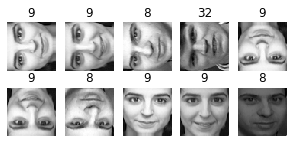

In [38]:
#Some image manipulation, such as rotations, flipping, darkening.
n_rotated = 4
rotated = np.transpose(xTrain2[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = yTrain2[:n_rotated]

n_flipped = 3
flipped = xTrain2[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = yTrain2[:n_flipped]

n_darkened = 3
darkened = xTrain2[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
darkened = darkened.reshape(-1, 64*64)
y_darkened = yTrain2[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [39]:
X_bad_faces_pca99 = pca99.transform(X_bad_faces)

In [40]:
X_bad_face = np.r_[31]

In [41]:
X_bad_faces_pca = pca99.transform(X_bad_face.reshape(1, -1))

In [42]:
reconstruction_errors(pca99, X_bad_face.reshape(-1, 1)).mean()

4.75183547190653

Overall, this exercise was a little bit confusing, maybe because the dataset is more advanced. I had trouble working with more/one image. The reconstruction error is much bigger after the images have been manipulated with indeed.